## Observations and Insights 

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
df = pd.merge(mouse_metadata,  study_results, on= "Mouse ID", how =  "outer")
# Display the data table for preview
df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of mice.
mouse_total = df["Mouse ID"].nunique()
mouse_total

249

In [12]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_df = df[df.duplicated(["Mouse ID", "Timepoint"])]
print("Duplicate ID's are:", dup_df["Mouse ID"], sep='\n')


Duplicate ID's are:
909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object


In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_df = df[df.duplicated(["Mouse ID", "Timepoint"])]
print("Duplicate ID's are:", dup_df, sep='\n')

Duplicate ID's are:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data = df.set_index("Mouse ID")
clean_df = data.drop("g989", axis=0)
clean_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [27]:
# Checking the number of mice in the clean DataFrame.
clean_df_count = clean_df.reset_index()
clean_df_count["Mouse ID"].nunique()

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume = clean_df["Tumor Volume (mm3)"]
# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean_numpy = np.mean(tumor_volume)
print(f"The mean tumor volume is {mean_numpy}")
median_numpy = np.median(tumor_volume)
print(f"The mean tumor volume is {median_numpy}")
mode_scipy = st.mode(tumor_volume)
print(f"The mean tumor volume is {mode_scipy}")
var_numpy = np.var(tumor_volume,ddof = 0)
print(f"The population variance using the NumPy module is {var_numpy}")
sd_numpy = np.std(tumor_volume,ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")


The mean tumor volume is 50.435293232255326
The mean tumor volume is 48.933453655
The mean tumor volume is ModeResult(mode=array([45.]), count=array([248]))
The population variance using the NumPy module is 79.42063964177214
The population standard deviation using the NumPy module is 8.911825830982792


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
clean_df["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

## Bar and Pie Charts

In [178]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using panda

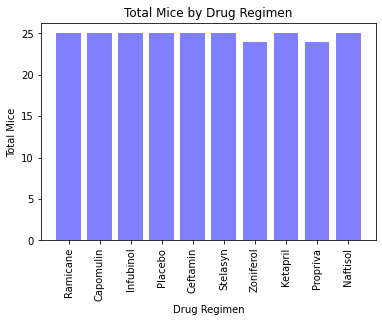

In [179]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
clean_df2 = clean_df.reset_index()
y_axis = clean_df2.groupby(["Drug Regimen"])["Mouse ID"].nunique()
x_axis = clean_df2["Drug Regimen"].unique()
plt.title("Total Mice by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice")
plt.bar(x_axis, y_axis, color= 'blue', alpha=0.5, align="center")
plt.xticks(x_axis, rotation='vertical')
plt.show()

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

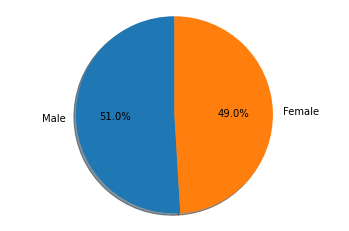

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = clean_df2["Sex"].unique()
sizes = clean_df2["Sex"].value_counts()
#explode = (0, 1) 


plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal') 

plt.show()


## Quartiles, Outliers and Boxplots

In [196]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# last_point= clean_df2(groupby('Mouse ID')["Timepoint"].max()
last_point2 = clean_df2.loc[clean_df2.groupby('Mouse ID')["Timepoint"].idxmax()]
# last_point2.sort_values("Timepoint")
clean_df2['Mouse ID']=clean_df2['Mouse ID'].astype(str)
clean_df2['Timepoint']=clean_df2['Timepoint'].astype(int)
df_merged2  = clean_df2.merge(last_point2, left_on='Mouse ID', right_on='Timepoint')
df_merged2
# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# df_merged = pd.merge(clean_df2, last_point2, on= "Mouse ID", how = 'right')
# df_merged.head(50)
# df_merged.loc[df_merged["Mouse ID"] == 's185',["Timepoint"]]

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [215]:
# Put treatments into a list for for loop (and later for plot labels)
# treatments = clean_df2["Drug Regimen"].unique()
# treatments

# Create empty list to fill with tumor vol data (for plotting)
# tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

        
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

TypeError: 'method' object is not iterable

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

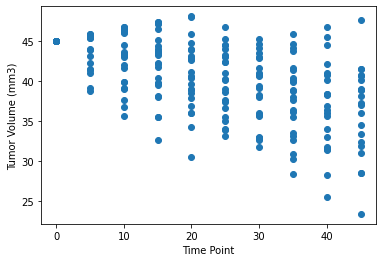

In [199]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_df = clean_df.loc[(clean_df['Drug Regimen']=="Capomulin"),:]
# Capomulin_df.head()
x_values = Capomulin_df['Timepoint']
y_values = Capomulin_df['Tumor Volume (mm3)']
plt.scatter(x_values, y_values)
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.show()            

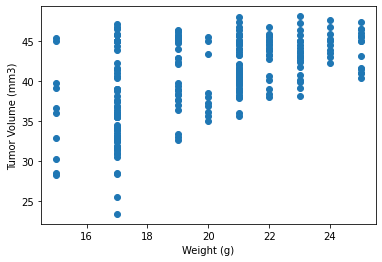

In [212]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_df = clean_df.loc[(clean_df['Drug Regimen']=="Capomulin"),:]
# Capomulin_df.head()
x_values = Capomulin_df['Weight (g)']
y_values = Capomulin_df['Tumor Volume (mm3)']
plt.scatter(x_values, y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
